In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('train.csv')  # Adjust filename as needed
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']]
df

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1710,3,2,208500
1,1262,3,2,181500
2,1786,3,2,223500
3,1717,3,1,140000
4,2198,4,2,250000
...,...,...,...,...
1455,1647,3,2,175000
1456,2073,3,2,210000
1457,2340,4,2,266500
1458,1078,2,1,142125


In [5]:
df=df.dropna()
df

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1710,3,2,208500
1,1262,3,2,181500
2,1786,3,2,223500
3,1717,3,1,140000
4,2198,4,2,250000
...,...,...,...,...
1455,1647,3,2,175000
1456,2073,3,2,210000
1457,2340,4,2,266500
1458,1078,2,1,142125


In [6]:
x=df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
print('independent features are:\n',x)

independent features are:
       GrLivArea  BedroomAbvGr  FullBath
0          1710             3         2
1          1262             3         2
2          1786             3         2
3          1717             3         1
4          2198             4         2
...         ...           ...       ...
1455       1647             3         2
1456       2073             3         2
1457       2340             4         2
1458       1078             2         1
1459       1256             3         1

[1460 rows x 3 columns]


In [7]:
y=df['SalePrice']
print('dependent features are:\n',y)

dependent features are:
 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split

X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print('x_traindata\n',X_train)
print('X_testdata \n',X_test)

(1168, 3)
(1168,)
x_traindata
       GrLivArea  BedroomAbvGr  FullBath
254        1314             3         1
1066       1571             3         2
638         796             2         1
799        1768             3         1
380        1691             3         2
...         ...           ...       ...
1095       1314             3         2
1130       1981             4         2
1294        864             2         1
860        1426             3         1
1126       1555             2         2

[1168 rows x 3 columns]
X_testdata 
       GrLivArea  BedroomAbvGr  FullBath
892        1068             3         1
1105       2622             3         2
413        1028             2         1
522        1664             3         2
1036       1620             2         2
...         ...           ...       ...
479        1131             2         1
1361       1530             3         2
802        1456             3         2
651        1510             4         1
722        

In [9]:
print('y_traindata\n',y_train)
print('y_testdata \n',y_test)

y_traindata
 254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64
y_testdata 
 892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
479      89471
1361    260000
802     189000
651     108000
722     124500
Name: SalePrice, Length: 292, dtype: int64


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
intercept=model.intercept_
print('intercept:\n',intercept)
coff=model.coef_
print('coff:\n',coff)

intercept:
 52261.748626944594
coff:
 [   104.02630701 -26655.16535734  30014.32410896]


In [11]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

y_pred = model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

print("R² Score:", r2_score(y_test, y_pred))
print('mse value\n=',mse)
print('mae value \n=',mae)

R² Score: 0.6341189942328371
mse value
= 2806426667.247853
mae value 
= 35788.0612924363


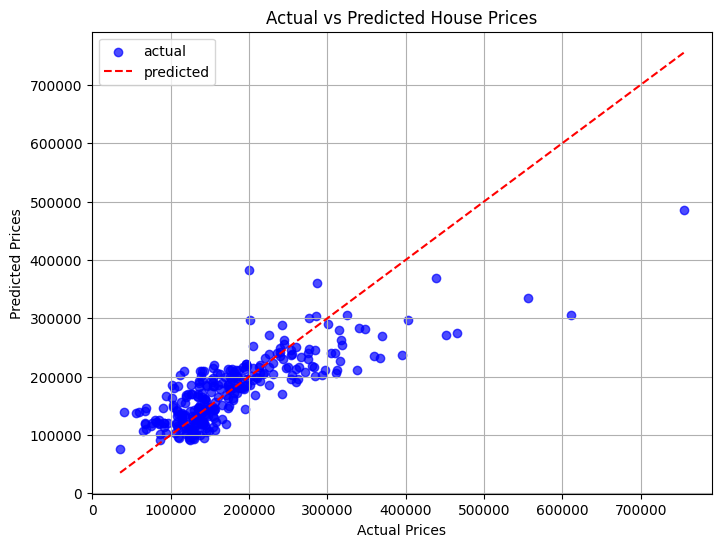

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue',label='actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--',label='predicted')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
area=int(input("enter area sqft:"))
bedrooms=int(input("enter number of bedrooms:"))
bathrooms=int(input("enter number of bathrooms:"))
predicted_price = model.predict([[area,bedrooms,bathrooms]])
print("Predicted Price:\n",predicted_price)

Predicted Price:
 [240377.51479736]


C:\Users\tsahi\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
